In [3]:
import pandas as pd

# Load the training subset
training_sample = pd.read_table('/Users/David/Desktop/Zillow/training_sample.tsv')
training_sample.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
0,13839640,-0.0131,2016-09-23,NaN,NaN,NaN,1.0,3.0,NaN,NaN,...,NaN,32214.0,241762.0,2015.0,209548.0,3084.48,NaN,NaN,6.059075e+13,-4.187693
1,14648482,-0.0060,2016-09-14,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,NaN,54034.0,90539.0,2015.0,36505.0,889.76,NaN,NaN,6.059063e+13,-4.042450
2,13096102,-0.0294,2016-09-15,1.0,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,120968.0,267866.0,2015.0,146898.0,3605.78,NaN,NaN,6.037408e+13,-4.030566


In [4]:
training_sample.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

In [10]:
training_sample.isnull().head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
0,False,False,False,True,True,True,False,False,True,True,...,True,False,False,False,False,False,True,True,False,False
1,False,False,False,True,True,True,False,False,True,True,...,True,False,False,False,False,False,True,True,False,False
2,False,False,False,False,True,True,False,False,True,False,...,True,False,False,False,False,False,True,True,False,False


In [11]:
# How many nulls per column?
training_sample.isnull().sum()

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           11523
architecturalstyletypeid        16951
basementsqft                    16993
bathroomcnt                         3
bedroomcnt                          3
buildingclasstypeid             16996
buildingqualitytypeid            6126
calculatedbathnbr                 191
decktypeid                      16869
finishedfloor1squarefeet        15627
calculatedfinishedsquarefeet       96
finishedsquarefeet12              834
finishedsquarefeet13            16993
finishedsquarefeet15            16338
finishedsquarefeet50            15627
finishedsquarefeet6             16931
fips                                3
fireplacecnt                    15114
fullbathcnt                       191
garagecarcnt                    11390
garagetotalsqft                 11390
hashottuborspa                  16592
heatingorsystemtypeid            6322
latitude    

In [13]:
# What's a good measure of square footage? Found two candidates
training_sample[['calculatedfinishedsquarefeet', 'finishedsquarefeet12']].head(5)

,calculatedfinishedsquarefeet,finishedsquarefeet12
0,1056.0,1056.0
1,1188.0,1188.0
2,1300.0,1300.0
3,1231.0,1231.0
4,1352.0,1352.0


In [27]:
# calculatedfinishedsquarefeet is the same as finishedsquarefeet12 in most cases
# calculatedfinishedsquarefeet has fewer nulls/NaNs so I'm going to use it as our square footage measure
(training_sample.calculatedfinishedsquarefeet != training_sample.finishedsquarefeet12).sum()

834

In [43]:
# Selecting 4 features for a first pass at linear regression
# Treating yearbuilt as continuous might be problematic but proceeding for now
# Get median values of features to populate missing data
bedroomcnt_median = training_sample.bedroomcnt.median()
calculatedfinishedsquarefeet_median = training_sample.calculatedfinishedsquarefeet.median()
lotsizesquarefeet_median = training_sample.lotsizesquarefeet.median()
yearbuilt_median = training_sample.yearbuilt.median()


In [44]:
# Sampling rows with missing values for validation later
training_sample[training_sample.bedroomcnt.isnull()]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
972,11905748,0.084014,2017-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.536321
4765,12133448,-1.062436,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.905818
12277,12039176,0.175751,2017-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.455370


In [49]:
# Replacing NaN values with median
training_sample['bedroomcnt'].fillna(bedroomcnt_median, inplace=True)
training_sample['calculatedfinishedsquarefeet'].fillna(calculatedfinishedsquarefeet_median, inplace=True)
training_sample['lotsizesquarefeet'].fillna(lotsizesquarefeet_median, inplace=True)
training_sample['yearbuilt'].fillna(yearbuilt_median, inplace=True)

# Check the NaN values have been replaced
training_sample[training_sample.parcelid == 11905748]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
972,11905748,0.084014,2017-01-18,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.536321


In [50]:
# Define dependent and independent variables
from sklearn.preprocessing import scale
X = scale(training_sample[['bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt']])
y = training_sample.logerror


In [51]:
# Fit regression model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X, y)

# Return R^2 value
# 0.001 is a terrible value. lol
print(regression.score(X, y))

0.00121149339181


In [52]:
training_sample.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,random_value
count,1.700000e+04,17000.000000,5477.000000,49.000000,7.000000,16997.000000,17000.000000,4.0,10874.000000,16809.000000,...,17000.000000,3899.000000,1.694600e+04,1.699700e+04,16997.000000,1.699700e+04,16997.000000,502.000000,1.690900e+04,17000.000000
mean,1.300920e+07,0.014759,1.845718,8.755102,547.285714,2.291522,3.051059,4.0,5.994206,2.317003,...,1968.702706,1.449346,1.824940e+05,4.678453e+05,2015.465082,2.858989e+05,5940.606218,13.954183,6.049357e+13,-1.750134
std,2.929329e+06,0.151606,3.020584,4.625701,451.355261,1.002234,1.150575,0.0,1.893141,0.978077,...,23.445242,0.546162,2.074370e+05,5.829212e+05,0.498794,4.370937e+05,7000.793616,4.154200,2.091310e+11,0.412381
min,1.071176e+07,-2.976000,1.000000,7.000000,252.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,1888.000000,1.000000,1.460000e+02,2.200000e+01,2015.000000,2.200000e+01,61.820000,6.000000,6.037101e+13,-4.187693
25%,1.156196e+07,-0.024300,1.000000,7.000000,292.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,1953.000000,1.000000,8.243900e+04,2.021760e+05,2015.000000,8.459100e+04,2784.900000,13.000000,6.037400e+13,-1.955165
50%,1.254964e+07,0.006000,1.000000,7.000000,352.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,1970.000000,1.000000,1.340240e+05,3.501070e+05,2015.000000,1.967500e+05,4487.660000,14.000000,6.037604e+13,-1.635605
75%,1.422276e+07,0.038333,1.000000,7.000000,557.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,1987.000000,2.000000,2.123710e+05,5.481650e+05,2016.000000,3.516160e+05,6821.840000,15.000000,6.059042e+13,-1.435186
max,1.676372e+08,4.520000,13.000000,21.000000,1528.000000,12.000000,16.000000,4.0,12.000000,12.000000,...,2015.000000,6.000000,6.932495e+06,2.650000e+07,2016.000000,2.450000e+07,305669.840000,99.000000,6.111009e+13,-1.273735


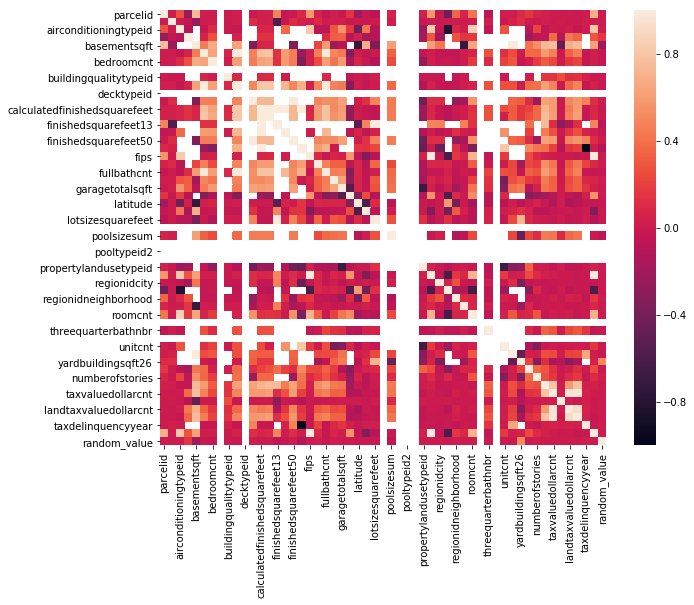

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nightmarish correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
correlations = training_sample.corr()
sns.heatmap(correlations)

# plt.matshow(training_sample.corr())
plt.show()

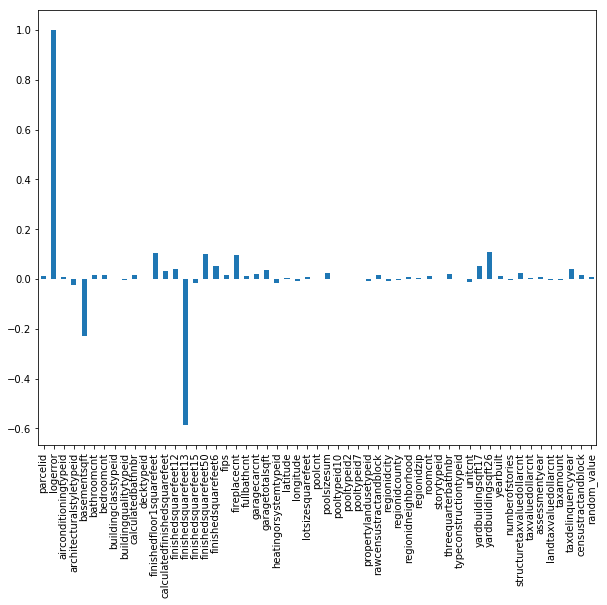

In [98]:
# Bar chart of correlations of variables to logerror
f, ax = plt.subplots(figsize=(10, 8))
correlations.logerror.plot(kind='bar')

plt.show()

In [74]:
correlations.logerror

parcelid                        0.010898
logerror                        1.000000
airconditioningtypeid           0.006404
architecturalstyletypeid       -0.024609
basementsqft                   -0.230432
bathroomcnt                     0.014344
bedroomcnt                      0.015870
buildingclasstypeid                  NaN
buildingqualitytypeid          -0.002218
calculatedbathnbr               0.015744
decktypeid                           NaN
finishedfloor1squarefeet        0.105892
calculatedfinishedsquarefeet    0.033055
finishedsquarefeet12            0.039628
finishedsquarefeet13           -0.587659
finishedsquarefeet15           -0.016309
finishedsquarefeet50            0.101904
finishedsquarefeet6             0.051231
fips                            0.015069
fireplacecnt                    0.094949
fullbathcnt                     0.013497
garagecarcnt                    0.020250
garagetotalsqft                 0.035876
heatingorsystemtypeid          -0.018237
latitude        

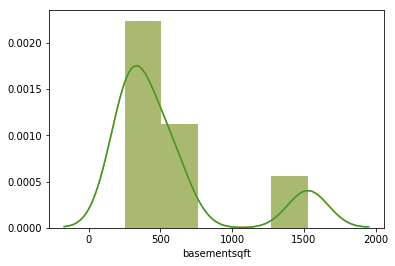

In [77]:
sns.distplot(training_sample.basementsqft.dropna())
plt.show()

In [81]:
training_sample.basementsqft.dropna().head(15)

6572      604.0
6847      352.0
7381      510.0
8367      273.0
8846     1528.0
13686     252.0
13734     312.0
Name: basementsqft, dtype: float64

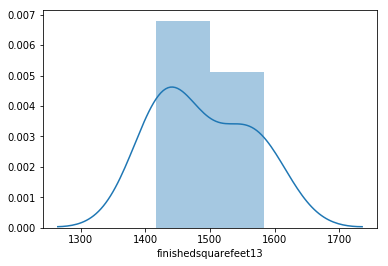

In [87]:
sns.distplot(training_sample.finishedsquarefeet13.dropna())
plt.show()

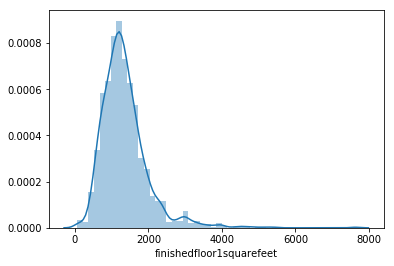

In [86]:
sns.distplot(training_sample.finishedfloor1squarefeet.dropna())
plt.show()

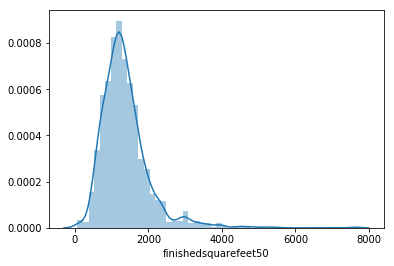

In [88]:
sns.distplot(training_sample.finishedsquarefeet50.dropna())
plt.show()

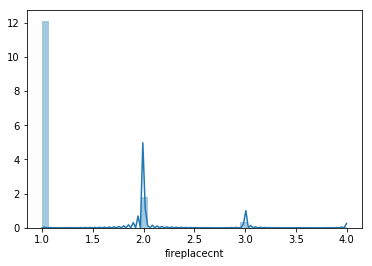

In [89]:
sns.distplot(training_sample.fireplacecnt.dropna())
plt.show()

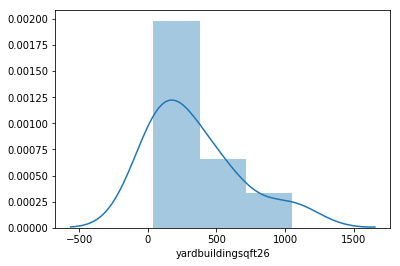

In [90]:
sns.distplot(training_sample.yardbuildingsqft26.dropna())
plt.show()

In [92]:
training_sample['calculated_square_ft_per_bedroom'] = training_sample.calculatedfinishedsquarefeet / training_sample.bedroomcnt 

In [97]:
# Does the relationship between number of rooms and total square footage correlate with logerror?
training_sample[['calculated_square_ft_per_bedroom', 'logerror']].corr()

,calculated_square_ft_per_bedroom,logerror
calculated_square_ft_per_bedroom,1.000000,0.020062
logerror,0.020062,1.000000
